In [1]:
import sys
sys.path.append('../hydroml')

from torch import load
from hydroml.dataset import BaryonDataset
from hydroml.plot import plot_cc_graph
from hydroml.utils import trim, Moments
from hydroml.model import BaryonModel
from torch.utils.data import DataLoader

In [2]:
# If you haven't trained a model yet, please go to the file 'baryons_train.ipynb' first!
model = load('../Trained Models/baryon_model_19gev.pt')
model.eval()

BaryonModel(
  (linear): Linear(in_features=141, out_features=141, bias=True)
)

In [4]:
dataset = BaryonDataset('../Datasets/NetbaryonDis_OSG3DAuAu19.6_tune18.3_wBulk_22momdeltaf')

data_loader = DataLoader(
    dataset=dataset,
    shuffle=True
)

Values for actual final state
Mean: 17.46241393692854
Standard Diviation: 9.926343976478547
Variance: 98.53230473937194 
Variance Error: 2.39154145490649
Skew: 0.6253631953465125
Skew Error: 1.8341163770982123
Kurtosis: 2.3632072857302275
Kurtosis Error: 11.391988724869687

Values for model output final state
Mean: 17.270385405350307
Standard Diviation: 9.750971888242802
Variance: 95.0814527653014 
Variance Error: 2.297471619952422
Skew: 0.6143054466358562
Skew Error: 1.774365357271155
Kurtosis: 2.3510519475069915
Kurtosis Error: 10.839695621288058


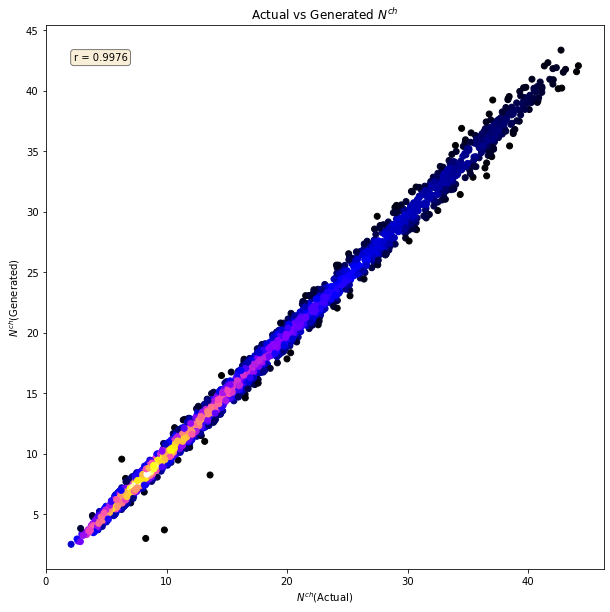

In [5]:
finals = []
models = []
bound_1 = -1
bound_2 = 1

import numpy as np

for i, data in enumerate(data_loader):

    baryons = data[0]
    protons = data[1].flatten()
    output = model(baryons.float())

    baryon_eta_trim, baryon_trim = trim( dataset.final_eta, protons, bound_1, bound_2  )
    _, output_trim = trim( dataset.final_eta, output.detach().numpy().flatten(), bound_1, bound_2  )

    finals.append( np.trapz( baryon_trim, x=baryon_eta_trim ) )
    models.append( np.trapz( output_trim, x=baryon_eta_trim ) )

finals_moments = Moments(finals)
models_moments = Moments(models)

print("Values for actual final state")
print(finals_moments)

print()

print("Values for model output final state")
print(models_moments)

plot_cc_graph(np.array(finals), np.array(models))